In [1]:
import csv
import pandas as pd

In [2]:
#CSV file might contain very huge fields, therefore increase the field_size_limit:
        
print(csv.field_size_limit())
csv.field_size_limit(100000000)
csv.field_size_limit()

131072


100000000

In [3]:
df = pd.read_csv('fake-news/train.csv')
#test = pd.read_csv('fake-news/test.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
X = df.drop('label', axis = 1)

In [6]:
y = df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [10]:
df = df.dropna()

In [11]:
df.shape

(18285, 5)

In [12]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
messages = df.copy()
messages.reset_index(inplace=True)

In [14]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages['title'][6]
#messages['text'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re
corpus = []

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
cv = CountVectorizer(max_features = 5000, ngram_range = (1, 3))
#tv = TfidfVectorizer(max_features = 5000, ngram_range = (1, 3))
X = cv.fit_transform(corpus).toarray()
#X = tv.fit_transform(corpus).toarray()

In [18]:
corpus[:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [19]:
X.shape

(18285, 5000)

In [20]:
messages.columns

Index(['index', 'id', 'title', 'author', 'text', 'label'], dtype='object')

In [21]:
y = messages['label']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
cv.get_feature_names()[:25]
#tv.get_feature_names()[:25]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus']

In [24]:
cv.get_params()
#tv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [25]:
count_df = pd.DataFrame(X, columns = cv.get_feature_names())
count_df.head()

# count_df = pd.DataFrame(X, columns = tv.get_feature_names())
# count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB

# Multinomial without Hyperparameter

In [33]:
clf = MultinomialNB()

In [36]:
import itertools
from sklearn import metrics
import numpy as np

accuracy: 0.902
Confusion matrix, without normalization


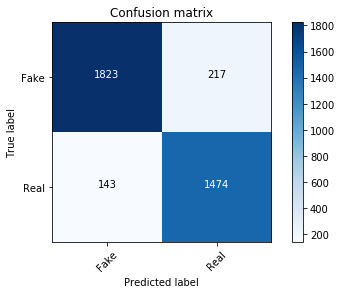

In [37]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('accuracy: %0.3f' %score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

# Passive Aggressive Classifier

In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
lin_clf = PassiveAggressiveClassifier(n_iter = 50)

C:\Users\91798\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy : 0.92
Confusion matrix, without normalization


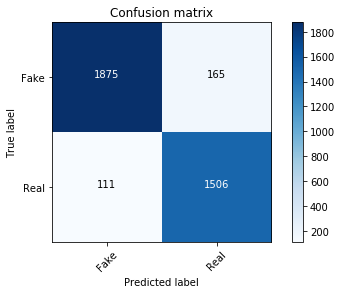

In [40]:
lin_clf.fit(X_train, y_train)
pred = lin_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('accuracy : %0.2f' %score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

# Multinomial with Hyperparameter

In [41]:
previous_score = 0
for alpha in np.arange(0, 1, 0.1):
    clf = MultinomialNB(alpha = alpha)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > previous_score:
        classifier = clf
    print("Alpha: {}, Score: {}".format(alpha, score))

C:\Users\91798\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score: 0.8955427946404156
Alpha: 0.1, Score: 0.9051134809953514
Alpha: 0.2, Score: 0.9051134809953514
Alpha: 0.30000000000000004, Score: 0.9059338255400602
Alpha: 0.4, Score: 0.9051134809953514
Alpha: 0.5, Score: 0.9042931364506426
Alpha: 0.6000000000000001, Score: 0.9037462400875034
Alpha: 0.7000000000000001, Score: 0.9026524473612251
Alpha: 0.8, Score: 0.9021055509980859
Alpha: 0.9, Score: 0.9015586546349467


In [42]:
features = cv.get_feature_names()
features[:25]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus']

In [43]:
print(classifier.coef_.shape)  # or print(classifier.coef_[0].shape)
classifier.coef_

(1, 5000)


array([[ -9.25630829,  -8.65949222,  -9.25630829, ..., -10.95090401,
         -8.77868073,  -9.48456694]])

In [44]:
# Most Real Words
sorted(zip(classifier.coef_[0], features), reverse = True)[:20]

[(-3.959114000028925, 'trump'),
 (-4.270607131437483, 'hillari'),
 (-4.354971714376536, 'clinton'),
 (-4.882221251134608, 'elect'),
 (-5.1420944065413465, 'new'),
 (-5.258669435885832, 'video'),
 (-5.262423194047336, 'comment'),
 (-5.357019074680328, 'us'),
 (-5.373693074987398, 'war'),
 (-5.3821355058826805, 'hillari clinton'),
 (-5.412258265337789, 'fbi'),
 (-5.461507250345735, 'vote'),
 (-5.475370688647845, 'email'),
 (-5.552741306436383, 'world'),
 (-5.5833715723846264, 'obama'),
 (-5.687063070936072, 'donald'),
 (-5.722174928212814, 'donald trump'),
 (-5.740204262730757, 'russia'),
 (-5.822321082694582, 'america'),
 (-5.842268552606346, 'presid')]

In [45]:
# Most Fake Words
sorted(zip(classifier.coef_[0], features))[:5000]

[(-10.950904007954136, 'abroad'),
 (-10.950904007954136, 'abus new'),
 (-10.950904007954136, 'abus new york'),
 (-10.950904007954136, 'act new'),
 (-10.950904007954136, 'act new york'),
 (-10.950904007954136, 'advic'),
 (-10.950904007954136, 'advis new'),
 (-10.950904007954136, 'advis new york'),
 (-10.950904007954136, 'age new'),
 (-10.950904007954136, 'age new york'),
 (-10.950904007954136, 'agenda breitbart'),
 (-10.950904007954136, 'aleppo new'),
 (-10.950904007954136, 'aleppo new york'),
 (-10.950904007954136, 'ali'),
 (-10.950904007954136, 'america breitbart'),
 (-10.950904007954136, 'america new york'),
 (-10.950904007954136, 'american breitbart'),
 (-10.950904007954136, 'american new'),
 (-10.950904007954136, 'american new york'),
 (-10.950904007954136, 'ami'),
 (-10.950904007954136, 'ami schumer'),
 (-10.950904007954136, 'amp'),
 (-10.950904007954136, 'applaud'),
 (-10.950904007954136, 'arson'),
 (-10.950904007954136, 'asian'),
 (-10.950904007954136, 'assail'),
 (-10.950904007